# Ordinary differential equations using neural networks

The general differential equation that we're tackling is given below:
![1](images/1.png)

After discretisation of the domain D<sup>^</sup> and its boundary set to the points D<sup>^</sup> and S<sup>^</sup>, we get the following equation:
![2](images/2.png)

If Ψt(x,p) denotes the trial solution with adjustable parameters p, we can transform the problem into:
![3](images/3.png)
Here, Ψt employs a feed forward network and parameters p corresponds to the weights and biases of the neural architecture.

We can choose the form of trial solution taking the sum of 2 terms:
![4](images/4.png)
Here, A contains no adjustable parameters so that it can satisfy the boundary conditions and F does not contribute to the boundary conditions.

*****************

Lets start by importing the packages that are required

In [48]:
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from autograd import grad

Now we'll construct a neural network with multilayer perceptron which has 1 hidden layer and 10 neurons in the hidden layer. Let the bias B be zero. Sigmoid function will be the activator and the error will be calculated using the gradient the backpropagation.
The sigmoid funtion is given by :
![5](images/5.png)

In [86]:
def sig(x): #Activator function
    return 1 / (1 + np.exp(-x))

def grad_sig(x): #function for calculating the gradient
    return sig(x) * (1 - sig(x))

def neuron(p,x): #neuron architecture
    a1 = sig(np.dot(x, p[0]))
    return np.dot(a1, p[1])

We need to calculate the loss by calculating the accuracy. The accuracy can be obtained by computing the solution of the derivative :
![6](images/6.png)
We need a function for calculating the derivative of the function N(x,p) which is given by :
![11](images/11.png)

We also need a trail solution which is given by :
![12](images/12.png)

In [87]:
def trial(ic,xi,res): #it takes the initial condition i.e. Ψ(0), the value of x and the result of the neural net
    return ic+xi*res

def der_func(p,x): #function to calculate the derivative
    return np.dot(np.dot(p[1].T,p[0].T),grad_sig(x))

Now, we'll take a problem and check our accuracy.
Let us consider this problem :
![7](images/7.png)
with x in [0,2] and
![8](images/8.png)
The trial neural form for this is :
![10](images/10.png)
The analytical solution is given by :
![9](images/9.png)

In [131]:
def A(x): #Function on the right
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))

def B(x): #Function on the left
    return x + (1. + 3.*x**2) / (1. + x + x**3)

def F(x,psi): #the function who's derivative will be calculated
    return A(x)-psi*B(x)

def Analytical(x): #Function for analytical solution
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

Now we'll make a function to calculate the loss.

In [132]:
def loss(p,x):
    loss_sum = 0.
    for xi in x:
        res = neuron(p, xi)[0][0]
        psi = 1. + xi * res
        d_res = der_func(p, xi)[0][0]
        d_psi = res + xi * d_res
        func = F(xi, psi)       
        err_sqr = (d_psi - func)**2

        loss_sum += err_sqr
    return loss_sum

Let's create inputs. Since there are 10 neurons in the hidden layer we'll create 10 points in the space.

In [133]:
x=np.linspace(0,1,10)

Let's choose random weights and train the neural net. The iteration occurs 1000 times. We're using gradient descent in the backprop.

In [134]:
p = [np.random.randn(1, 10), np.random.randn(10, 1)]
lmb = 0.001
for i in range(1000):
    loss_grad =  grad(loss)(p,x)
    p[0] = p[0]-lmb*loss_grad[0]
    p[1] = p[1]-lmb*loss_grad[1]

Let's check the accuracy

In [135]:
print(loss(p,x))

0.253945275082


Let's compare the output of the neural network with the analytical solution.

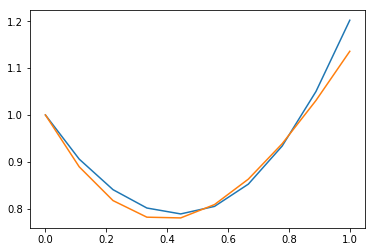

In [137]:
y=Analytical(x)
res_nn=[1 + xi * neuron(p, xi)[0][0] for xi in x]
plt.figure()
plt.plot(x,y)
plt.plot(x,res_nn)
plt.show()

We can see that the output of our neural net is close to the actual output. (Blue - Analytical solution, Orange - Neural Net solution)

***

Let's solve some more problems

### PROBLEM 2

Let us consider this problem :
![13](images/13.png)
![14](images/14.png)
The trial neural form for this is :
![16](images/16.png)
The analytical solution is given by :
![15](images/15.png)

In [141]:
def A(x): #Function on the right
    return np.exp(-x/5) * np.cos(x)

def B(x): #Function on the left
    return 1/5

def F(x,psi): #the function who's derivative will be calculated
    return A(x)-psi*B(x)

def Analytical(x): #Function for analytical solution
    return np.exp(-x/5) * np.sin(x)

Now we'll make a function to calculate the loss.

In [142]:
def loss(p,x):
    loss_sum = 0.
    for xi in x:
        res = neuron(p, xi)[0][0]
        psi = xi * res
        d_res = der_func(p, xi)[0][0]
        d_psi = res + xi * d_res
        func = F(xi, psi)       
        err_sqr = (d_psi - func)**2

        loss_sum += err_sqr
    return loss_sum

Let's create inputs and weights and train the model.

In [143]:
x=np.linspace(0,2,10)
p = [np.random.randn(1, 10), np.random.randn(10, 1)]
lmb = 0.001
for i in range(1000):
    loss_grad =  grad(loss)(p,x)
    p[0] = p[0]-lmb*loss_grad[0]
    p[1] = p[1]-lmb*loss_grad[1]

Let's check the accuracy

In [144]:
print(loss(p,x))

0.151503984984


Let's compare the output of the neural network with the analytical solution.

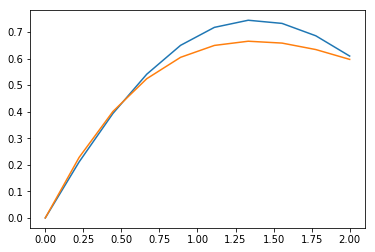

In [145]:
y=Analytical(x)
res_nn=[xi * neuron(p, xi)[0][0] for xi in x]
plt.figure()
plt.plot(x,y)
plt.plot(x,res_nn)
plt.show()

The solution looks good.

References :


Neural Networks for solving differential equations by Alex Honchar : https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c
Artifial Neural Networks for Solving Ordinary and Partial Differential Equations : https://arxiv.org/pdf/physics/9705023.pdf